In [273]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
#import sweeps:

short_8_sweep = np.fliplr(np.loadtxt('../../../Sweep-Txt-Files/matrix_8_short_n_0.2-1.2_sr_0-1.txt'))
short_4_sweep = np.fliplr(np.loadtxt('../../../Sweep-Txt-Files/Nick_PTE4_Short_2DSweep.txt'))

In [275]:
specular_ratio_values = np.linspace(0,1,256)
n_values = np.linspace(0.2,1.2,256)

short_8_subtracted = short_8_sweep - short_4_sweep 

In [276]:

def plot_heatmap(array, color_scheme, colorbar_label, title, ax, vmin = None, vmax = None):
    if ax is None:
            fig, ax = plt.subplots(figsize=(6, 6))  # Create a new figure and axis if ax is None
    cax = ax.imshow(array, cmap=color_scheme)

    if vmin and vmax:
        cax = ax.imshow(array, cmap=color_scheme, vmin = vmin, vmax = vmax)
    

    x_positions = np.linspace(0, 256, 6)
    x_labels = np.linspace(0.2, 1.2, 6)

    ax.set_xticks(x_positions)
    ax.set_xticklabels([f"{x:.1f}" for x in x_labels])

    y_positions = np.linspace(0, 256, 6)
    y_labels = np.linspace(1, 0, 6)

    ax.set_yticks(y_positions)
    ax.set_yticklabels([f"{y:.1f}" for y in y_labels])

    cbar = plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(colorbar_label)
    
    ax.set_title(title)
    ax.set_xlabel('Real Part of Refractive Index (n)')
    ax.set_ylabel('Specular Ratio')

def create_side_by_side_plots(array1, array2, color_scheme, colorbar_label, title1, title2, same_bar = True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    vmin = vmax = None
    if same_bar:
        vmin = min(array1.min(), array2.min())
        vmax = max(array1.max(), array2.max())

    plot_heatmap(array1, color_scheme, colorbar_label, title1, ax1, vmin = vmin, vmax = vmax)
    plot_heatmap(array2, color_scheme, colorbar_label, title2, ax2, vmin = vmin, vmax = vmax)

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
      

In [277]:
def plot_correlation(array1, array2, arr1_label, arr2_label):
    # Flatten the 2D arrays to 1D
    flattened_array1 = array1.flatten()
    flattened_array2 = array2.flatten()

    # Compute the Pearson correlation coefficient
    correlation_matrix = np.corrcoef(flattened_array1, flattened_array2)

    # Create the correlation heatmap
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', 
                cbar_kws={"shrink": 0.8}, ax=ax, annot_kws={"size": 12})
    title="Correlation Heatmap between " + arr1_label + " and " + arr2_label
    ax.set_title(title)
    ax.set_xticklabels([arr1_label, arr2_label], rotation=45)
    ax.set_yticklabels([arr1_label, arr2_label], rotation=45)

    plt.tight_layout()
    plt.show()

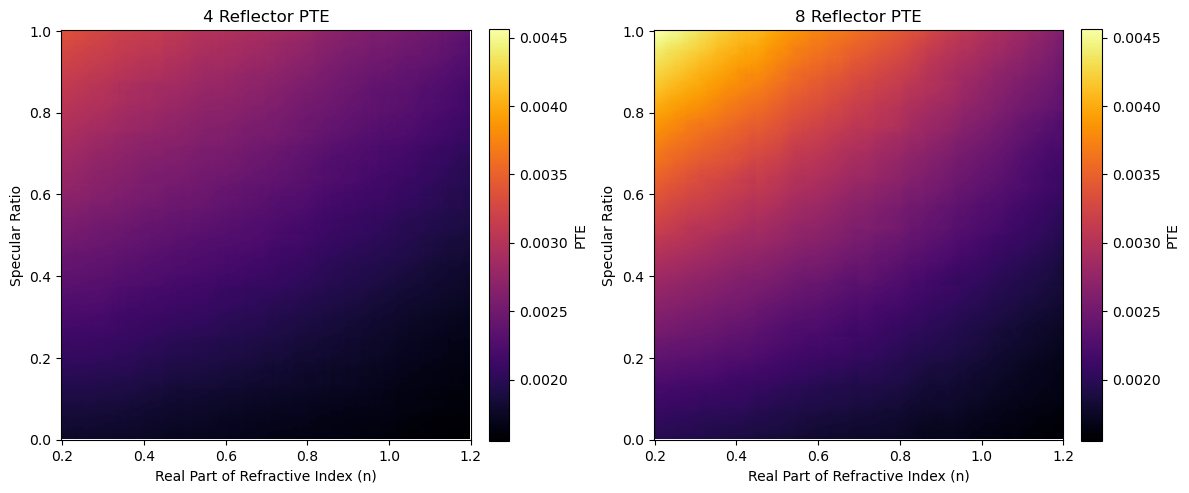

In [278]:
create_side_by_side_plots(short_4_sweep, short_8_sweep, 'inferno', 'PTE', '4 Reflector PTE', '8 Reflector PTE')


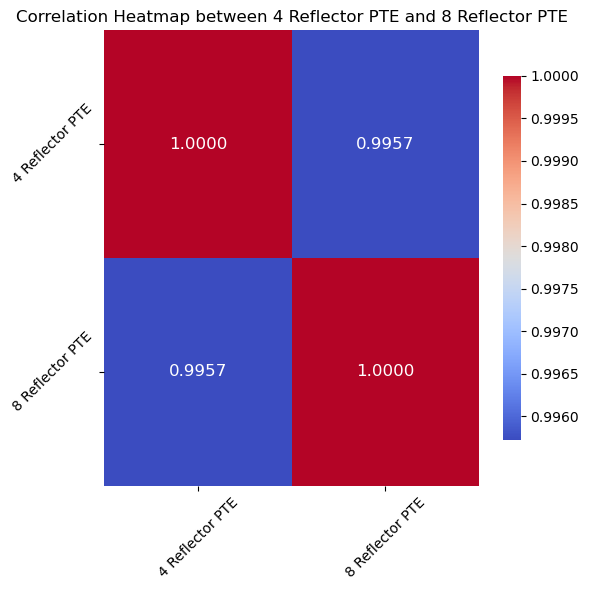

In [279]:
plot_correlation(short_4_sweep, short_8_sweep, '4 Reflector PTE', '8 Reflector PTE')

In [280]:
pte_short_no_reflector = 0.0013598
short_4_ratio = short_4_sweep/pte_short_no_reflector
short_8_ratio = short_8_sweep/pte_short_no_reflector
short_8_subtracted_ratio = short_8_ratio - short_4_ratio
short_4_subtracted_ratio = short_4_ratio - 1


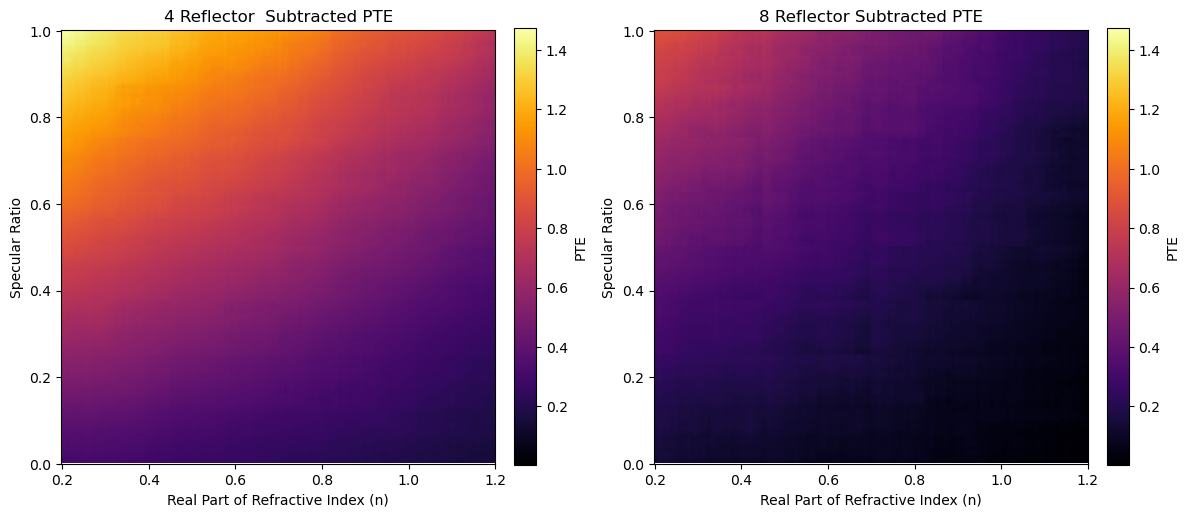

In [281]:
create_side_by_side_plots(short_4_subtracted_ratio, short_8_subtracted_ratio, 'inferno', 'PTE', '4 Reflector  Subtracted PTE', '8 Reflector Subtracted PTE')

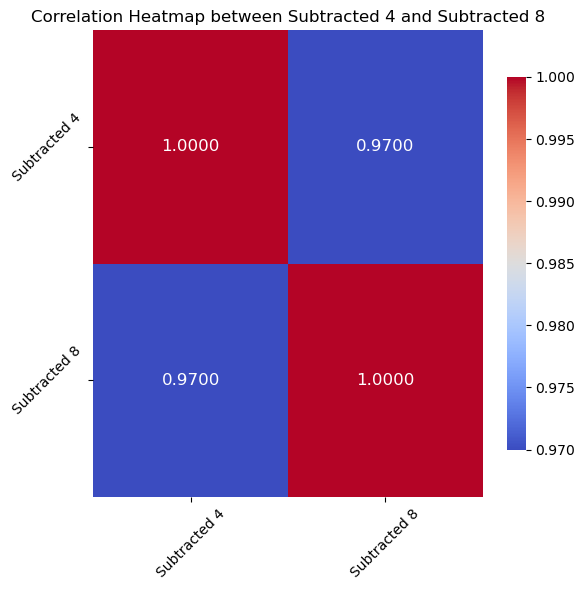

In [282]:
plot_correlation(short_4_subtracted_ratio, short_8_subtracted_ratio, 'Subtracted 4', 'Subtracted 8')

In [283]:
def apply_score_function(pte_arr, alpha_ratio):
    return -np.abs(pte_arr - alpha_ratio)**(0.5)

In [287]:
alpha_4 = 1.44
alpha_8 = 2.46
alpha_4_subtracted = alpha_4 - 1
alpha_8_subtracted = alpha_8 - alpha_4


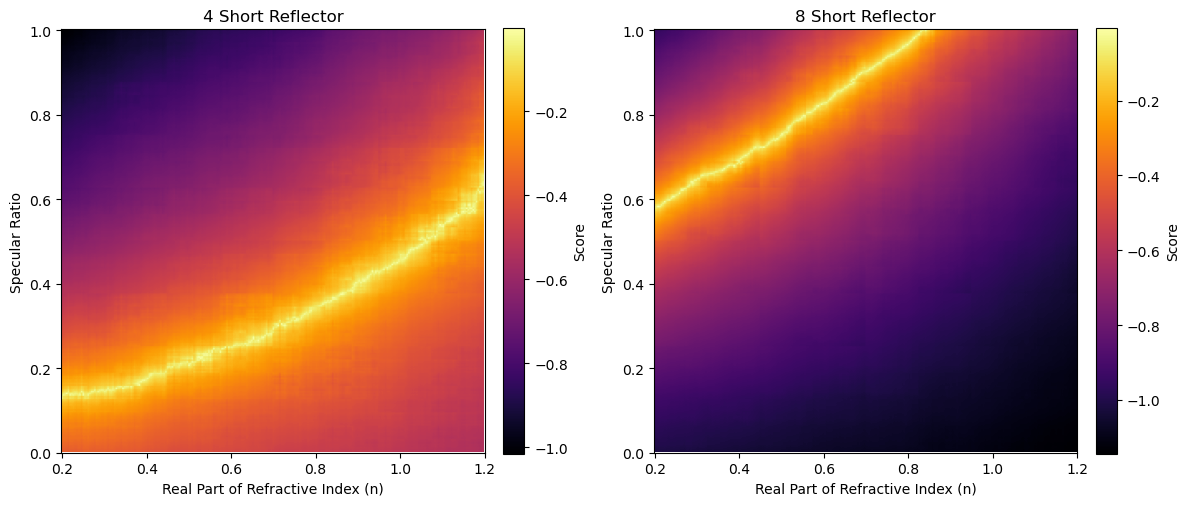

In [285]:
scored_4 = apply_score_function(short_4_ratio, alpha_4)
scored_8 = apply_score_function(short_8_ratio, alpha_8)

create_side_by_side_plots(scored_4, scored_8, 'inferno', 'Score', '4 Short Reflector', '8 Short Reflector', same_bar = False)

TypeError: cannot unpack non-iterable NoneType object

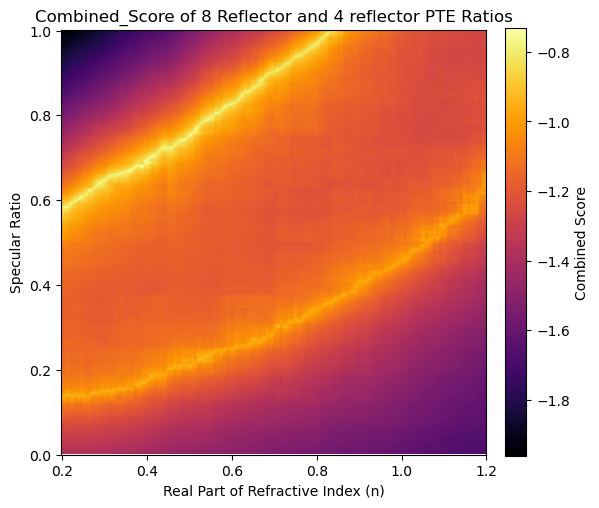

In [286]:
overlaid_score = scored_8 + scored_4
fig, ax = plot_heatmap(overlaid_score, 'inferno', 'Combined Score', 'Combined_Score of 8 Reflector and 4 reflector PTE Ratios', ax = None, vmin = None, vmax = None)
plt.show()


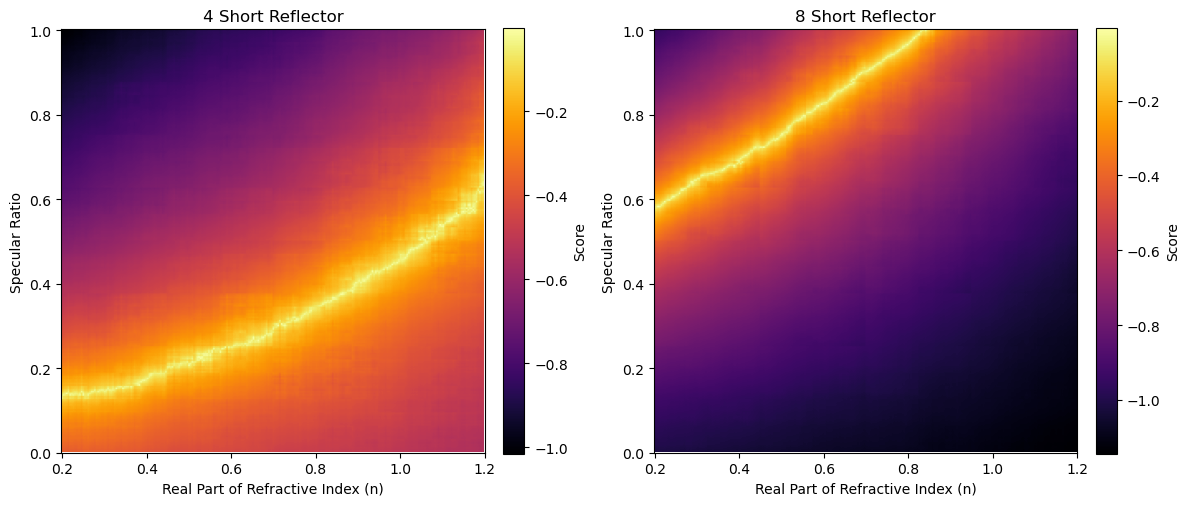

In [288]:
scored_4_subtracted = apply_score_function(short_4_subtracted_ratio, alpha_4_subtracted)
scored_8_subtracted = apply_score_function(short_8_subtracted_ratio, alpha_8_subtracted)

create_side_by_side_plots(scored_4, scored_8, 'inferno', 'Score', '4 Short Reflector', '8 Short Reflector', same_bar = False)